#Humanitarian Aid to Syria from the United States 
This data is from ForeignAssistance.gov for [Syria](https://www.foreignassistance.gov/explore/country/Syria). The time range for this data is 2010 - 2017

### Importing raw data retrived from foreignassistance.gov

In [0]:
import pandas as pd
sample_syrian_aid = pd.read_excel("syria_foreign_assistance.xlsx", sample=10)
pd.DataFrame(sample_syrian_aid.sample(10))

,Award_Identifier,Extending_Organization,Extending_Organization_Office,Accountable_Organization,Accountable_Organization_Office,Implementing_Organization,Implementing_Organization_Type,Implementing_Organization_Country,Implementing_Organization_DUNS_Number,Award_Title,...,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name,Award_Transaction_US_Foreign_Assistance_Code,Award_Transaction_US_Foreign_Assistance_Category,Award_Transaction_US_Foreign_Assistance_Sector,Treasury_Account_Codes,Treasury_Account_Title,Treasury_Account_Start_Fiscal_Year,Treasury_Account_End_Fiscal_Year,Data_Submission_Date
4659,C468C443554D,U.S. Agency for International Development,NaN,U.S. Agency for International Development,Bureau for the Middle East,Vendor implementing direct administrative serv...,NaN,NaN,NaN,Administrative Costs,...,91010,Administrative costs,8001,Program Management,Direct Administrative Costs,72 1021,"Development Assistance, Agency for Internation...",0,0,2017-06-30
3555,AID-OFDA-A-15-00063,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",The vendor name has been redacted in accordanc...,National NGO,United States,NaN,USAID/OFDA Cooperative Agreement for Syria/Com...,...,72010,Material relief assistance and services,7001,Humanitarian Assistance,"Protection, Assistance and Solutions",72 1035,"International Disaster Assistance, Funds Appro...",2015,0,2017-12-31
1468,AID-OAA-C-14-00041,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",The vendor name has been redacted in accordanc...,Private Sector,United States,NaN,Crisis Assistance and Recovery,...,72010,Material relief assistance and services,7001,Humanitarian Assistance,"Protection, Assistance and Solutions",72 1035,"International Disaster Assistance, Funds Appro...",2013,2014,2015-03-31
1986,506578DC8EFA,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",Vendor implementing direct administrative serv...,NaN,NaN,NaN,Administration and Oversight,...,43010,Multisector aid,8001,Program Management,Direct Administrative Costs,72 1037,"Economic Support Fund, Funds Appropriated to t...",0,0,2014-09-30
255,29920170408,U.S. Department of State,NaN,U.S. Department of State,Bureau†Of International†Narcotics†And†Law Enfo...,CELESTAR CORPORATION,Private Sector,NaN,135230832,102840002R,...,43010,Multisector aid,9000,Multi-sector,Multi-sector - Unspecified,11 1022,International Narcotics Control and Law Enforc...,2015,2016,2018-01-29
4218,AID-OFDA-A-16-00037,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",The vendor name has been redacted in accordanc...,National NGO,United States,NaN,USAID/OFDA COOP for Syria/Complex Emergency,...,72050,Relief co-ordination; protection and support s...,7001,Humanitarian Assistance,"Protection, Assistance and Solutions",72 1035,"International Disaster Assistance, Funds Appro...",2016,0,2017-03-31
4420,0004A3646A,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",Personal Services Contractors - USAID,NaN,NaN,NaN,Program Design and Learning,...,43010,Multisector aid,8001,Program Management,Direct Administrative Costs,72 1027,"Transition Initiatives, Funds Appropriated to ...",2014,0,2015-03-31
3293,AID-OFDA-A-13-00001,U.S. Agency for International Development,NaN,U.S. Agency for International Development,"Bureau for Democracy, Conflict, and Humanitari...",The vendor name has been redacted in accordanc...,National NGO,United States,NaN,Logistics and Relief in Syria,...,72010,Material relief assistance and services,7001,Humanitarian Assistance,"Protection, Assistance and Solutions",72 1035,"Internation

In [0]:
print(list(sample_syrian_aid))

['Award_Identifier', 'Extending_Organization', 'Extending_Organization_Office', 'Accountable_Organization', 'Accountable_Organization_Office', 'Implementing_Organization', 'Implementing_Organization_Type', 'Implementing_Organization_Country', 'Implementing_Organization_DUNS_Number', 'Award_Title', 'Award_Description', 'Award_Status', 'Award_Collaboration_Type', 'Award_Total_Estimated_Value', 'Award_Interagency_Transfer_Status', 'Award_Start_Date', 'Award_End_Date', 'Recipient_Location', 'Award_Transaction_Description ', 'Award_Transaction_Value', 'Award_Transaction_Type', 'Award_Transaction_Date', 'Award_Transaction_Fiscal_Year', 'Award_Transaction_Fiscal_Quarter', 'Award_Transaction_Aid_Type', 'Award_Transaction_Tied_Status', 'Award_Transaction_Flow_Type', 'Award_Transaction_Finance_Type', 'Award_Transaction_DAC_Purpose_Code', 'Award_Transaction_DAC_Purpose_Code_Name', 'Award_Transaction_US_Foreign_Assistance_Code', 'Award_Transaction_US_Foreign_Assistance_Category', 'Award_Transactio

### Cleaning data for desired variables

In [0]:
syria_aid = sample_syrian_aid[["Accountable_Organization", "Implementing_Organization", "Award_Status", "Award_Total_Estimated_Value", "Award_Start_Date", "Award_End_Date", "Award_Transaction_Value", "Award_Transaction_DAC_Purpose_Code", "Award_Transaction_DAC_Purpose_Code_Name", 'Award_Transaction_US_Foreign_Assistance_Category']]
pd.DataFrame(syria_aid.sample(10))

,Accountable_Organization,Implementing_Organization,Award_Status,Award_Total_Estimated_Value,Award_Start_Date,Award_End_Date,Award_Transaction_Value,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name,Award_Transaction_US_Foreign_Assistance_Category
4485,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,1992351.0,2015-10-01,2018-09-30,153092.82,72050,Relief co-ordination; protection and support s...,Humanitarian Assistance
22,U.S. Department of State,Information Redacted,Completion,0.0,NaT,NaT,36.42,72050,Relief co-ordination; protection and support s...,Humanitarian Assistance
939,U.S. Agency for International Development,U.S. Government - U.S. Agency for Internationa...,Implementation,0.0,2017-10-01,2018-09-30,10452.17,72050,Relief co-ordination; protection and support s...,Humanitarian Assistance
1075,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-10-30,2017-09-30,1193359.61,72010,Material relief assistance and services,Humanitarian Assistance
609,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,19715973.0,2015-10-01,2018-09-30,3800000.00,72010,Material relief assistance and services,Humanitarian Assistance
3983,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2013-10-01,2014-09-30,1901.80,91010,Administrative costs,Program Management
4556,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,1500000.0,2016-04-15,2018-09-30,-101433.31,72010,Material relief assistance and services,Humanitarian Assistance
309,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2014-10-01,2015-09-30,23504.35,91010,Administrative costs,Program Management
3750,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,5600000.0,2016-10-01,2018-09-30,5600000.00,15220,"Civilian peace-building, conflict prevention a...",Peace and Security
3552,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,10782547.0,2015-10-01,2018-09-30,1489498.40,72010,Material relief assistance and services,Humanitarian Assistance


In [0]:
syria_aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 10 columns):
Accountable_Organization                            4884 non-null object
Implementing_Organization                           4884 non-null object
Award_Status                                        4884 non-null object
Award_Total_Estimated_Value                         4884 non-null float64
Award_Start_Date                                    4492 non-null datetime64[ns]
Award_End_Date                                      4492 non-null datetime64[ns]
Award_Transaction_Value                             4884 non-null float64
Award_Transaction_DAC_Purpose_Code                  4884 non-null int64
Award_Transaction_DAC_Purpose_Code_Name             4884 non-null object
Award_Transaction_US_Foreign_Assistance_Category    4884 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 381.6+ KB


### Identifying types of aid per year

This isn't exactly what I'm looking for so we will group by other columns.

In [0]:
syria_aid_types = pd.DataFrame((syria_aid.groupby)('Award_Transaction_DAC_Purpose_Code_Name')['Award_Start_Date'].value_counts())
#pd.DataFrame(syria_aid_types)

## Cleaning Data:
###Date range:
The data had dates ranging from as early as 2007. I want to look at aid during the Syrian Civil War so I change the date range to start at 2010. 

In [0]:
import datetime
syria_conflict_aid = syria_aid[(syria_aid["Award_Start_Date"]>datetime.date(2010,1,1))]
pd.DataFrame(syria_conflict_aid.sample(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,Accountable_Organization,Implementing_Organization,Award_Status,Award_Total_Estimated_Value,Award_Start_Date,Award_End_Date,Award_Transaction_Value,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name,Award_Transaction_US_Foreign_Assistance_Category
4136,U.S. Agency for International Development,"Blumont Engineering Solutions, Inc",Implementation,44998925.0,2016-06-18,2018-09-30,3627180.92,15220,"Civilian peace-building, conflict prevention a...",Peace and Security
4359,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2016-10-01,2017-09-30,4554.82,15220,"Civilian peace-building, conflict prevention a...",Peace and Security
4523,U.S. Agency for International Development,Personal Services Contractors - USAID,Completion,0.0,2013-10-01,2015-09-30,1566.30,72010,Material relief assistance and services,Humanitarian Assistance
3402,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-10-01,2015-09-30,377779.68,72010,Material relief assistance and services,Humanitarian Assistance
641,U.S. Department of State,CELESTAR CORPORATION,Completion,6500000.0,2016-05-03,2018-05-02,-4000.00,43010,Multisector aid,Multi-sector
1490,U.S. Agency for International Development,Personal Services Contractors - USAID,Completion,0.0,2013-10-01,2014-09-30,691.33,72010,Material relief assistance and services,Humanitarian Assistance
198,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Implementation,0.0,2017-10-01,2018-09-30,142796.91,91010,Administrative costs,Program Management
3735,U.S. Agency for International Development,Consortium for Elections and Political Process...,Implementation,7190000.0,2015-06-15,2018-06-19,36316.94,15151,Elections,"Democracy, Human Rights, and Governance"
2284,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,3597319.0,2015-09-15,2017-09-30,1153699.06,72010,Material relief assistance and services,Humanitarian Assistance
1922,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Implementation,0.0,2017-10-01,2018-09-30,-16437.43,91010,Administrative costs,Program Management


## Network building: 
I want to build a network connecting Implementing Organizations to the different types of aid they fund. 

### Grouping data:

In [0]:
syria_aid_orgs = pd.DataFrame({'count' : syria_conflict_aid.groupby(["Implementing_Organization","Award_Transaction_DAC_Purpose_Code_Name"]).size()}).reset_index()
pd.DataFrame(syria_aid_orgs.head(10))

,Implementing_Organization,Award_Transaction_DAC_Purpose_Code_Name,count
0,ACF International,Relief co-ordination; protection and support s...,1
1,AURANITIS LIFE LINE FOR DEVELOPMENT AND TRAINING,"Civilian peace-building, conflict prevention a...",1
2,Agency for Technical Cooperation and Development,Emergency food aid,1
3,Agency for Technical Cooperation and Development,Material relief assistance and services,1
4,Agency for Technical Cooperation and Development,Relief co-ordination; protection and support s...,2
5,American Refugee Committee International,Material relief assistance and services,1
6,American Refugee Committee International,Relief co-ordination; protection and support s...,1
7,"BLUMONT ENGINEERING SOLUTIONS, INC.","Civilian peace-building, conflict prevention a...",4
8,Bert Smith and Co,Administrative costs,1
9,Bert Smith and Co,Multisector aid,1


Seeing how many types of aid there are:

In [0]:
syria_aid.Award_Transaction_DAC_Purpose_Code_Name.drop_duplicates()

0                                    Administrative costs
1                 Material relief assistance and services
3                                         Multisector aid
4       Relief co-ordination; protection and support s...
6       Civilian peace-building, conflict prevention a...
13                   Disaster prevention and preparedness
24                                     Emergency food aid
50               Economic and development policy/planning
117           Energy policy and administrative management
379            Democratic participation and civil society
452                 Security system management and reform
491                                 Sectors not specified
760     Decentralisation and support to subnational go...
825                     Food aid/Food security programmes
2870                                            Elections
Name: Award_Transaction_DAC_Purpose_Code_Name, dtype: object

Seeing the types of aid identified by the U.S. types

In [0]:
syria_aid.Award_Transaction_US_Foreign_Assistance_Category.drop_duplicates()

0                           Program Management
1                      Humanitarian Assistance
6                           Peace and Security
16                                Multi-sector
50     Democracy, Human Rights, and Governance
117                       Economic Development
163              Education and Social Services
Name: Award_Transaction_US_Foreign_Assistance_Category, dtype: object

### Building the actual network:

In [0]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(syria_aid_orgs["Implementing_Organization"], node_type="organization")
G.add_nodes_from(syria_aid_orgs["Award_Transaction_DAC_Purpose_Code_Name"], node_type="aid")
G.add_weighted_edges_from(syria_aid_orgs.values)

nx.write_graphml(G, "syria_aid.graphml")


### Network with aid amounts:

I want to build a network that shows the connection between implementing organizations and their aid type, and also the amount donated per organization for each kind of aid.

### Grouping and adding values summed:

In [0]:
syria_aid_values = pd.DataFrame({'Total Amount' : syria_conflict_aid.groupby(["Implementing_Organization","Award_Transaction_DAC_Purpose_Code_Name"])["Award_Transaction_Value"].sum()}).reset_index()
pd.DataFrame(syria_aid_values.head(10))

,Implementing_Organization,Award_Transaction_DAC_Purpose_Code_Name,Total Amount
0,ACF International,Relief co-ordination; protection and support s...,100000.00
1,AURANITIS LIFE LINE FOR DEVELOPMENT AND TRAINING,"Civilian peace-building, conflict prevention a...",529720.00
2,Agency for Technical Cooperation and Development,Emergency food aid,5000000.00
3,Agency for Technical Cooperation and Development,Material relief assistance and services,125000.00
4,Agency for Technical Cooperation and Development,Relief co-ordination; protection and support s...,15675000.00
5,American Refugee Committee International,Material relief assistance and services,-256900.00
6,American Refugee Committee International,Relief co-ordination; protection and support s...,1500000.00
7,"BLUMONT ENGINEERING SOLUTIONS, INC.","Civilian peace-building, conflict prevention a...",16296889.84
8,Bert Smith and Co,Administrative costs,43203.59
9,Bert Smith and Co,Multisector aid,43203.59


### Building the network:

In [0]:
Gvalues = nx.Graph()
Gvalues.add_nodes_from(syria_aid_orgs["Implementing_Organization"], node_type="organization")
Gvalues.add_nodes_from(syria_aid_orgs["Award_Transaction_DAC_Purpose_Code_Name"], node_type="aid")
Gvalues.add_weighted_edges_from(syria_aid_orgs.values)

nx.write_graphml(Gvalues, "syria_aid_values.graphml")

## Data Visualization:

In [0]:
import matplotlib.pyplot as plt

### I want to group types of aid by year, so I am adding a column that has only year for a date value:

In [0]:
syria_conflict_aid["Year"]=syria_conflict_aid["Award_Start_Date"].map(lambda x: x.year)
#del syria_conflict_aid['npAward_Transaction_Value']
pd.DataFrame(syria_conflict_aid.sample(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Accountable_Organization,Implementing_Organization,Award_Status,Award_Total_Estimated_Value,Award_Start_Date,Award_End_Date,Award_Transaction_Value,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name,Award_Transaction_US_Foreign_Assistance_Category,Year
3465,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-10-01,2015-09-30,29793.82,72010,Material relief assistance and services,Humanitarian Assistance,2012
4243,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2016-10-01,2017-09-30,76245.72,43010,Multisector aid,Program Management,2016
3459,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,22450338.0,2013-10-01,2018-09-30,1101000.00,72040,Emergency food aid,Humanitarian Assistance,2013
3948,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Implementation,0.0,2013-10-01,2018-09-30,42725.86,72040,Emergency food aid,Humanitarian Assistance,2013
2384,U.S. Agency for International Development,U.S. Government - U.S. Agency for Internationa...,Implementation,346068.0,2016-10-01,2018-09-30,18994.28,72050,Relief co-ordination; protection and support s...,Humanitarian Assistance,2016
55,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,21907904.0,2013-09-24,2016-09-30,5389834.00,72040,Emergency food aid,Humanitarian Assistance,2013
2620,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,3500000.0,2015-09-30,2017-09-30,1041763.00,72010,Material relief assistance and services,Humanitarian Assistance,2015
24,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-02-27,2017-09-30,68430222.19,72040,Emergency food aid,Humanitarian Assistance,2012
1995,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,1650000.0,2014-10-17,2017-09-30,564846.00,72040,Emergency food aid,Humanitarian Assistance,2014
2476,U.S. Agency for International Development,U.S. Government - U.S. Agency for Internationa...,Implementation,262094.0,2016-10-01,2018-09-30,23298.60,72050,Relief co-ordination; protection and support s...,Humanitarian Assistance,2016


In [0]:
syria_conflict_aid.to_csv("syria_conflict_aid_clean.csv")

### Creating a table with date, value, and year to possibly correlate with registered refugees

In [0]:
syria_aid_value_year = syria_conflict_aid[["Award_Start_Date", "Award_Transaction_Value", "Year"]]
pd.DataFrame(syria_aid_value_year.sample(10))

,Award_Start_Date,Award_Transaction_Value,Year
1408,2016-10-01,418018.28,2016
207,2015-04-29,5034764.75,2015
569,2016-05-03,-297.50,2016
1133,2012-10-01,14369.58,2012
4679,2016-10-01,52535.79,2016
3964,2014-10-01,8473.58,2014
3949,2013-01-25,1977953.40,2013
4434,2012-02-27,1781968.30,2012
939,2017-10-01,10452.17,2017
4235,2012-10-01,55.00,2012


In [0]:
syria_aid_value_year.to_csv("syria_aid_value_year_table.csv")

### Summing the amount of aid provided per year and adding a money format

In [0]:
syria_aid_years = pd.DataFrame({'Total_Amount' : syria_conflict_aid.groupby(["Year"])["Award_Transaction_Value"].sum()}).reset_index()
pd.options.display.float_format = '${:,.2f}'.format
pd.DataFrame(syria_aid_years)


,Year,Total_Amount
0,2011,"$25,644.00"
1,2012,"$1,722,596,279.04"
2,2013,"$1,330,098,715.62"
3,2014,"$191,402,588.64"
4,2015,"$2,065,318,463.99"
5,2016,"$1,099,183,172.06"
6,2017,"$516,954,083.42"
7,2018,"$21,144,844.11"


In [0]:
syria_aid_years.to_csv('syria_aid_per_year_table.csv')

### Aid types sorted by year with summed values

In [0]:
syria_aid_types_values = pd.DataFrame({'Total_Amount' : syria_conflict_aid.groupby(["Year","Award_Transaction_DAC_Purpose_Code_Name"])["Award_Transaction_Value"].sum()}).reset_index()
pd.options.display.float_format = '${:,.2f}'.format

pd.DataFrame(syria_aid_types_values)

,Year,Award_Transaction_DAC_Purpose_Code_Name,Total_Amount
0,2011,Relief co-ordination; protection and support s...,"$25,644.00"
1,2012,Administrative costs,"$60,237.53"
2,2012,"Civilian peace-building, conflict prevention a...","$7,133,530.00"
3,2012,Disaster prevention and preparedness,"$164,105.10"
4,2012,Emergency food aid,"$1,406,972,734.78"
5,2012,Energy policy and administrative management,"$12,097.96"
6,2012,Food aid/Food security programmes,"$3,815,274.21"
7,2012,Material relief assistance and services,"$292,059,934.35"
8,2012,Multisector aid,"$3,528,249.41"
9,2012,Relief co-ordination; protection and support s...,"$8,850,115.70"


### Visualizing data

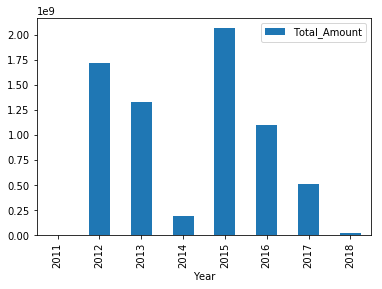

In [0]:

import matplotlib
import matplotlib.pyplot as plt
ax = plt.gca()
syria_aid_years.plot(kind='bar',x='Year',y='Total_Amount',ax=ax)
pd.options.display.float_format = '${:,.2f}'.format

plt.show()

#plt.savefig("aid_per_year.pdf")